# Data Preparation using NLP technique

In [1]:
import nltk
import re
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

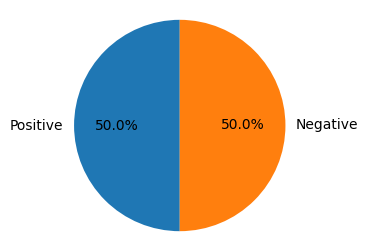

In [3]:
fig = plt.figure(figsize=(3, 3))
labels = 'Positive', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.show()

In [4]:
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+|#\w+|https\s+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

In [5]:
all_positive_tweets = [clean_tweet(tweet) for tweet in all_positive_tweets]
all_negative_tweets = [clean_tweet(tweet) for tweet in all_negative_tweets]

In [6]:
total_tweet = all_positive_tweets + all_negative_tweets


In [25]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=False)
token = [tokenizer.tokenize(tweet) for tweet in total_tweet]

In [8]:
data = []
tweets = []
stemmer = PorterStemmer()
for lst in tqdm(token):
    tweet = []
    for word in lst:
        if word not in stopwords.words('english'):
            data.append(stemmer.stem(word))
            tweet.append(stemmer.stem(word))
    tweets.append(tweet)
vocab = list(set(data))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 485.96it/s]


In [9]:
len(vocab)

12026

In [26]:
tweets_joined = [" ".join(tweet) for tweet in tweets]

In [11]:
vec = TfidfVectorizer(lowercase=True, ngram_range=(1,2),  max_features=4000)
vec

TfidfVectorizer(max_features=4000, ngram_range=(1, 2))

In [12]:
data_transformed = vec.fit_transform(tweets_joined)

In [13]:
x = data_transformed.toarray()

In [14]:
y = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

## Predicting Sentiment using Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7615


In [21]:
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.74      0.79      0.77       988
    Positive       0.78      0.73      0.76      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [27]:
def predict_sentiment(text):
    text = clean_tweet(text)
    tokens = tokenizer.tokenize(text)
    processed_tokens = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]
    processed_text = " ".join(processed_tokens)
    vector = vec.transform([processed_text]).toarray()
    prediction = model.predict(vector)
    return "Positive 😊" if prediction[0] == 1 else "Negative 😞"


In [31]:
# Example usage
text_input = "I hate this new phone! It's amazing for you."
print(predict_sentiment(text_input))

Negative 😞
